In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the datasets
dim_customers = pd.read_csv(r'C:\Users\ASUS\Documents\projects data analytics\C8_Input_Files\C8_Input_Files\dim_customers.csv', delimiter=',')

# Load fact_spends with semicolon delimiter
fact_spends = pd.read_csv(r'C:\Users\ASUS\Documents\projects data analytics\C8_Input_Files\C8_Input_Files\fact_spends.csv', delimiter=';')



# Merge the datasets for analysis
merged_data = pd.merge(fact_spends, dim_customers, on='customer_id')


c:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Total Spending by Month

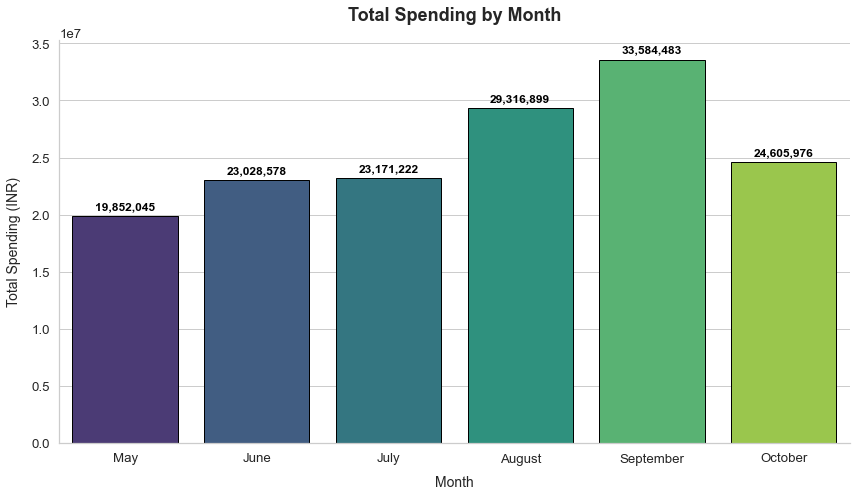

In [2]:
# Group by month and calculate total spending
monthly_spending = merged_data.groupby('month')['spend'].sum().reset_index()

# Define month order for sorting
month_order = ['May', 'June', 'July', 'August', 'September', 'October']
monthly_spending['month'] = pd.Categorical(monthly_spending['month'], categories=month_order, ordered=True)
monthly_spending = monthly_spending.sort_values('month')

# Set modern Seaborn style
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

plt.figure(figsize=(12, 7))  
ax = sns.barplot(
    data=monthly_spending, 
    x='month', 
    y='spend', 
    hue='month',  
    palette='viridis', 
    legend=False,  
    edgecolor='black'  
)

# Add labels and title with improved font properties
plt.title('Total Spending by Month', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Total Spending (INR)', fontsize=14, labelpad=10)

# Annotate values on bars for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12, color='black', fontweight='bold')

# Remove top and right spines for cleaner look
sns.despine();

# Display the plot
plt.tight_layout();
plt.show();


Spending by City

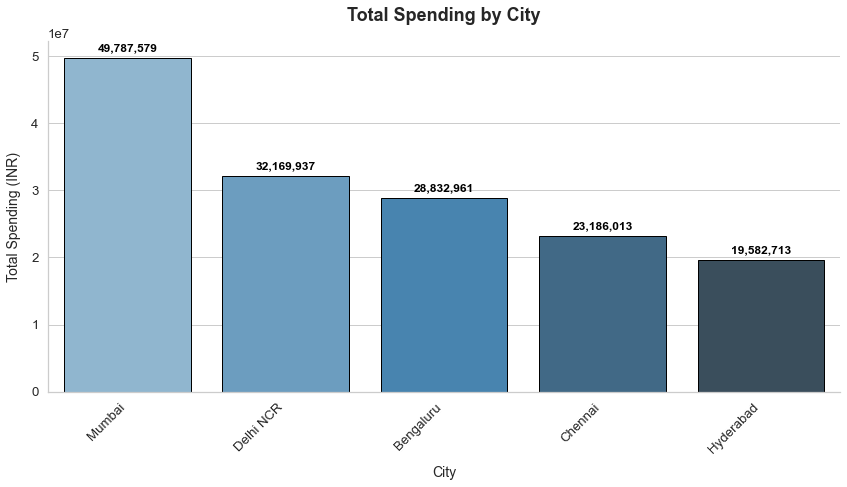

In [3]:
# Group by city and calculate total spending
city_spending = merged_data.groupby('city')['spend'].sum().reset_index()

# Sort values for better presentation
city_spending = city_spending.sort_values(by='spend', ascending=False)

# Set modern Seaborn style
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# Create the plot
plt.figure(figsize=(12, 7))  # Slightly larger for clarity
ax = sns.barplot(
    data=city_spending, 
    x='city', 
    y='spend', 
    hue='city',  # Assign 'city' to hue to resolve palette warning
    palette='Blues_d', 
    legend=False, 
    edgecolor='black'  # Adds definition to bars
)

# Add labels and title with improved font properties
plt.title('Total Spending by City', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.ylabel('Total Spending (INR)', fontsize=14, labelpad=10)

# Annotate bar values for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12, color='black', fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Remove unnecessary spines
sns.despine()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()




Spending by Age Group

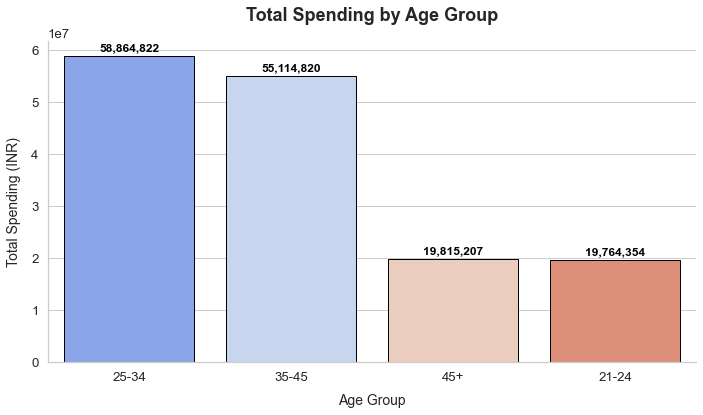

In [4]:
# Group by age group and calculate total spending
age_group_spending = merged_data.groupby('age_group')['spend'].sum().reset_index()

# Sort the data by spending for better presentation
age_group_spending = age_group_spending.sort_values(by='spend', ascending=False)

# Set modern Seaborn style
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust size for clarity
ax = sns.barplot(
    data=age_group_spending, 
    x='age_group', 
    y='spend', 
    hue='age_group',  # Assign hue to resolve palette warning
    palette='coolwarm', 
    legend=False, 
    edgecolor='black'
)

# Add title and labels with improved styling
plt.title('Total Spending by Age Group', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=14, labelpad=10)
plt.ylabel('Total Spending (INR)', fontsize=14, labelpad=10)

# Annotate values on bars for better clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points', 
                fontsize=12, color='black', fontweight='bold')

# Remove unnecessary spines
sns.despine()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


Spending by Occupation

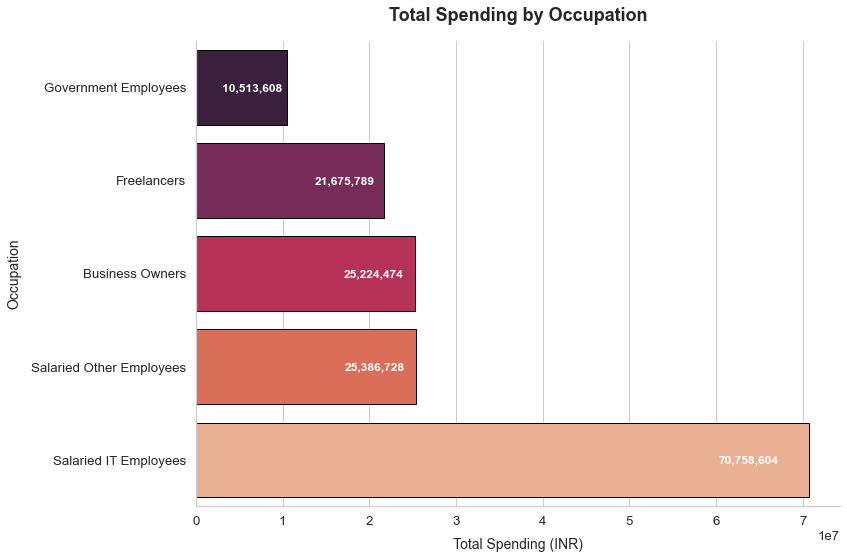

In [5]:
# Group by occupation and calculate total spending
occupation_spending = merged_data.groupby('occupation')['spend'].sum().reset_index()

# Sort the data by spending for a clean presentation
occupation_spending = occupation_spending.sort_values(by='spend', ascending=True)

# Set a modern Seaborn theme
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# Create the plot
plt.figure(figsize=(12, 8))  # Increased height for clarity
ax = sns.barplot(
    data=occupation_spending, 
    x='spend', 
    y='occupation', 
    hue='occupation',  # Resolve palette warning
    palette='rocket', 
    legend=False, 
    edgecolor='black'  # Adds definition to bars
)

# Add labels and title with enhanced styling
plt.title('Total Spending by Occupation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Total Spending (INR)', fontsize=14, labelpad=10)
plt.ylabel('Occupation', fontsize=14, labelpad=10)

# Annotate values on the bars for better clarity
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', 
                (p.get_width() - 0.05 * p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='right', va='center', 
                fontsize=12, color='white', fontweight='bold')

# Remove unnecessary spines for a cleaner look
sns.despine()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


Spending by Payment Type

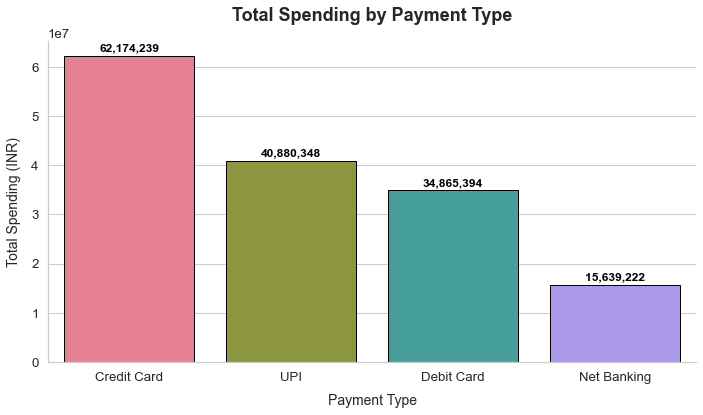

In [6]:
# Group by payment type and calculate total spending
payment_spending = merged_data.groupby('payment_type')['spend'].sum().reset_index()

# Sort the data for better presentation
payment_spending = payment_spending.sort_values(by='spend', ascending=False)

# Set a modern Seaborn theme
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# Create the plot
plt.figure(figsize=(10, 6))  # Adjusted size for better readability
ax = sns.barplot(
    data=payment_spending, 
    x='payment_type', 
    y='spend', 
    hue='payment_type',  # Resolve palette warning
    palette='husl', 
    legend=False, 
    edgecolor='black'  # Adds definition to bars
)

# Add title and labels with enhanced styling
plt.title('Total Spending by Payment Type', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Payment Type', fontsize=14, labelpad=10)
plt.ylabel('Total Spending (INR)', fontsize=14, labelpad=10)

# Annotate values on the bars for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points', 
                fontsize=12, color='black', fontweight='bold')

# Remove unnecessary spines for a cleaner look
sns.despine()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


Top 10 High-Value Customers

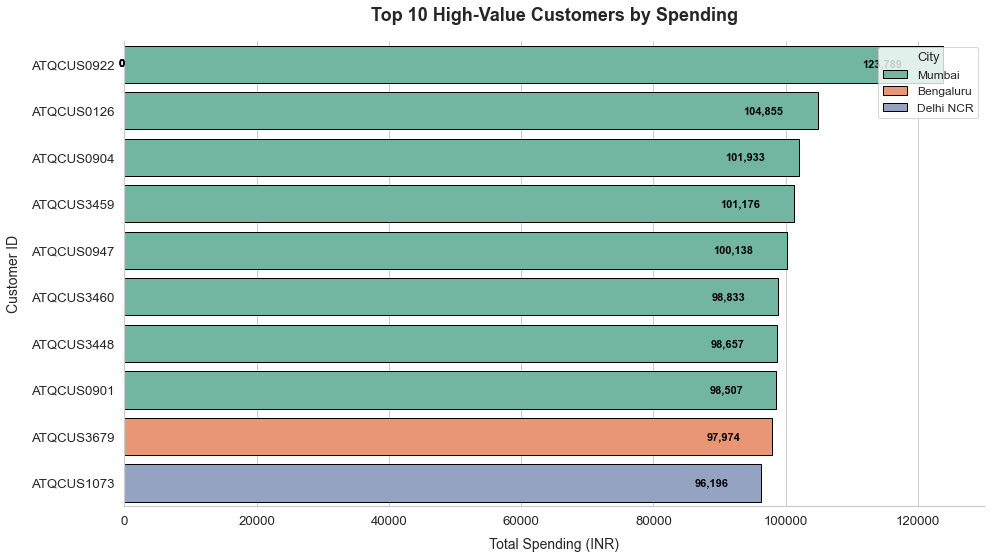

In [7]:
# Find the top 10 customers with the highest spending
top_customers = (merged_data
                 .groupby(['customer_id', 'city', 'occupation'])['spend']
                 .sum()
                 .reset_index()
                 .sort_values(by='spend', ascending=False)
                 .head(10))

# Set a modern Seaborn theme
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# Create the plot
plt.figure(figsize=(14, 8))  # Wider figure for better spacing
ax = sns.barplot(
    data=top_customers, 
    x='spend', 
    y='customer_id', 
    hue='city', 
    dodge=False,  # Prevent separation of bars by hue
    palette='Set2', 
    edgecolor='black'  # Add definition to bars
)

# Add title and axis labels with enhanced styling
plt.title('Top 10 High-Value Customers by Spending', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Total Spending (INR)', fontsize=14, labelpad=10)
plt.ylabel('Customer ID', fontsize=14, labelpad=10)

# Annotate values on the bars for better clarity
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', 
                (p.get_width() - 0.05 * p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='right', va='center', 
                fontsize=11, color='black', fontweight='bold')

# Adjust legend position and appearance
plt.legend(title='City', loc='upper right', fontsize=12, title_fontsize=13)

# Remove unnecessary spines for a cleaner look
sns.despine()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


Monthly Category Trends

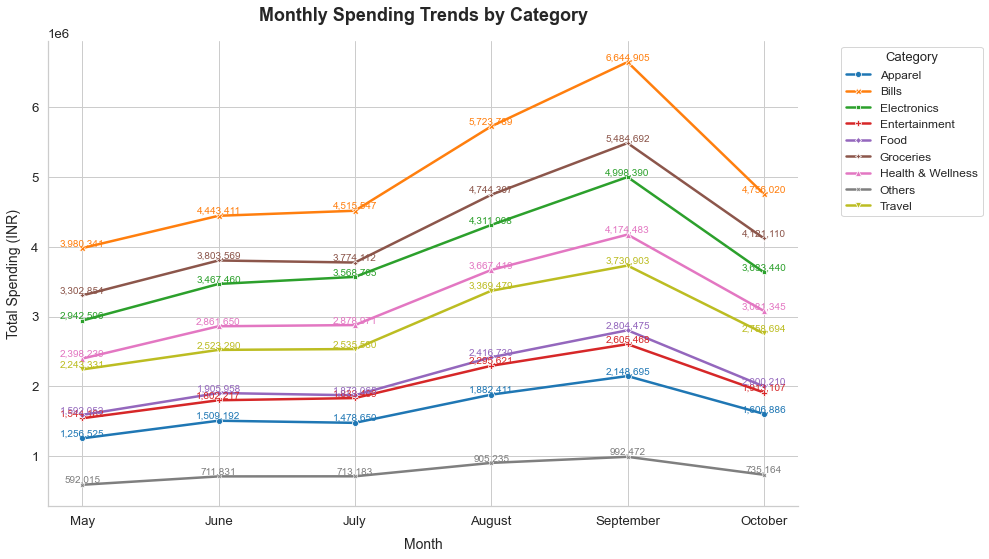

In [8]:
# Group by month and category
monthly_category_spending = merged_data.groupby(['month', 'category'])['spend'].sum().reset_index()

# Sort months
monthly_category_spending['month'] = pd.Categorical(
    monthly_category_spending['month'], 
    categories=month_order, 
    ordered=True
)

# Set a modern Seaborn theme
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# Create the plot
plt.figure(figsize=(14, 8))  # Wider figure for better spacing
ax = sns.lineplot(
    data=monthly_category_spending, 
    x='month', 
    y='spend', 
    hue='category', 
    style='category', 
    markers=True, 
    dashes=False,  # Solid lines for clarity
    palette='tab10', 
    linewidth=2.5
)

# Add title and axis labels with enhanced styling
plt.title('Monthly Spending Trends by Category', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Total Spending (INR)', fontsize=14, labelpad=10)

# Customize the legend placement and appearance
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)

# Annotate data points with spending values
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        if not pd.isna(y):
            plt.text(
                x, y, f'{y:,.0f}', 
                ha='center', va='bottom', fontsize=10, color=line.get_color()
            )

# Remove unnecessary spines for a cleaner look
sns.despine()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()



Income vs Spending Analysis

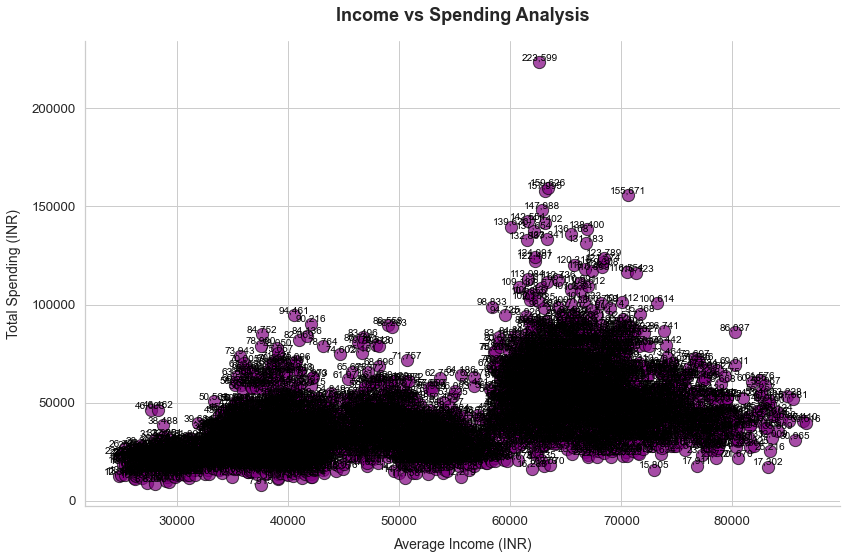

In [9]:
# Group by average income and calculate total spending
income_spending = merged_data.groupby('avg_income')['spend'].sum().reset_index()

# Set a modern Seaborn theme
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# Create the scatter plot
plt.figure(figsize=(12, 8))  # Wider figure for better spacing
ax = sns.scatterplot(
    data=income_spending, 
    x='avg_income', 
    y='spend', 
    color='purple', 
    s=150,  # Adjust marker size
    alpha=0.7,  # Add transparency
    edgecolor='black'  # Add edge color for better visibility
)

# Add title and axis labels with enhanced styling
plt.title('Income vs Spending Analysis', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Average Income (INR)', fontsize=14, labelpad=10)
plt.ylabel('Total Spending (INR)', fontsize=14, labelpad=10)

# Annotate key data points (optional, highlights specific values)
for i, row in income_spending.iterrows():
    plt.text(
        row['avg_income'], row['spend'], 
        f'{row["spend"]:,.0f}', 
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Remove unnecessary spines for a cleaner look
sns.despine()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()



Spending by Category and City

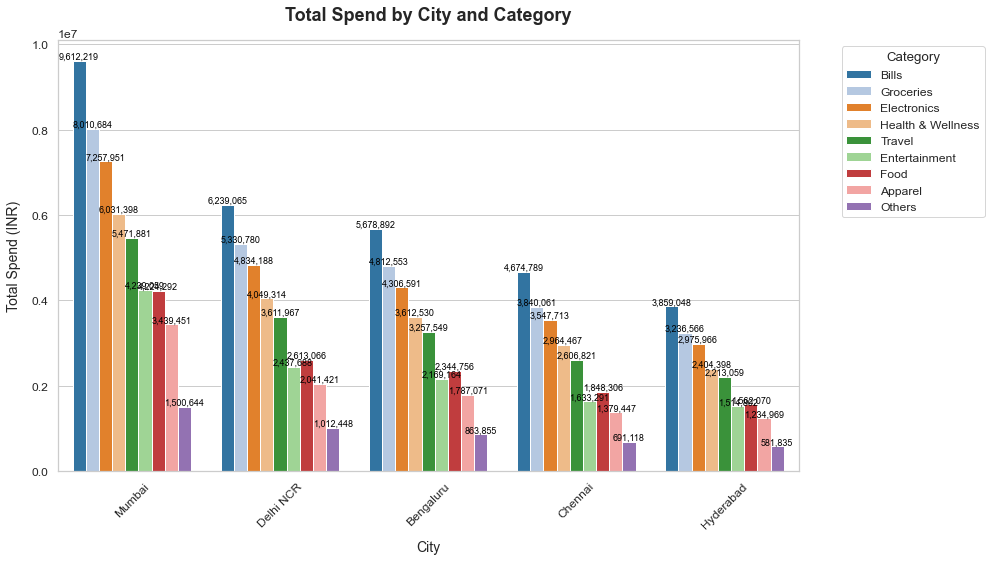

In [10]:
merged_data = pd.merge(fact_spends, dim_customers, on='customer_id')

# Aggregate spend by city and category
city_category_spend = merged_data.groupby(['city', 'category'])['spend'].sum().reset_index()

# Sort the data by total spend per city for better visualization
city_category_spend = city_category_spend.sort_values(by='spend', ascending=False)

# Set the modern Seaborn theme
sns.set_theme(style="whitegrid", palette="tab20", font_scale=1.1)

# Visualization: Stacked bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=city_category_spend, x='city', y='spend', hue='category', palette="tab20")

# Add data labels to the bars
for p in ax.patches:
    if p.get_height() > 0:  # Avoid labels for empty bars
        ax.annotate(f'{int(p.get_height()):,}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=9, color='black')

# Add titles and labels
plt.title("Total Spend by City and Category", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("City", fontsize=14, labelpad=10)
plt.ylabel("Total Spend (INR)", fontsize=14, labelpad=10)

# Optimize legend placement
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Optimize layout
plt.xticks(rotation=45)  # Rotate city labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


Average Spend by Occupation

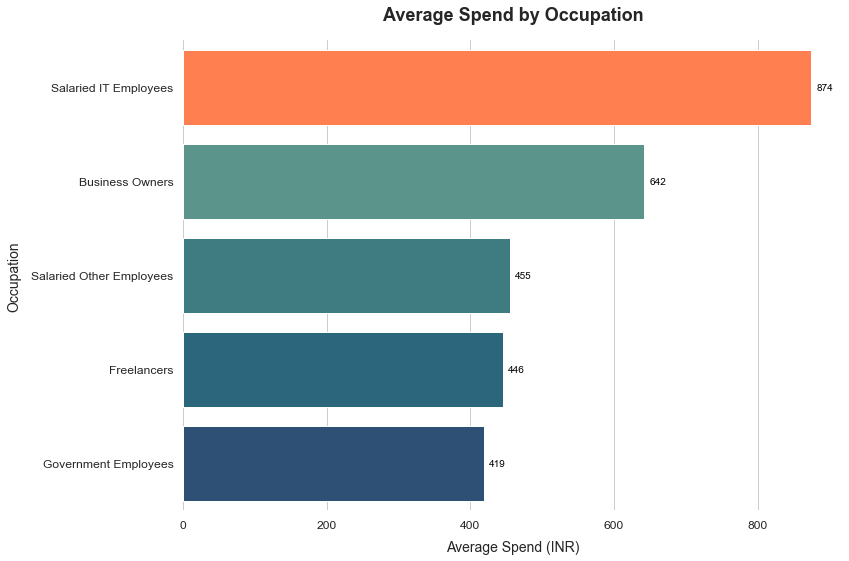

In [11]:

occupation_spend = (merged_data.groupby('occupation')['spend']
                   .mean()
                   .sort_values(ascending=False)
                   .reset_index())

# Set Seaborn theme and palette
sns.set_theme(style="whitegrid", font_scale=1.1)

# Visualization: Horizontal bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=occupation_spend, 
                 y='occupation', 
                 x='spend', 
                 hue='occupation',  # Assign the y variable to hue
                 palette='crest', 
                 legend=False)  # Disable legend

# Highlight the top bar
top_bar = ax.patches[0]
top_bar.set_facecolor('#FF7F50')  # Coral color for the top bar

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

# Add titles and labels
plt.title("Average Spend by Occupation", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Average Spend (INR)", fontsize=14, labelpad=10)
plt.ylabel("Occupation", fontsize=14, labelpad=10)

# Remove unnecessary spines for a cleaner look
sns.despine(left=True, bottom=True)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


Average Spend by Payment Type

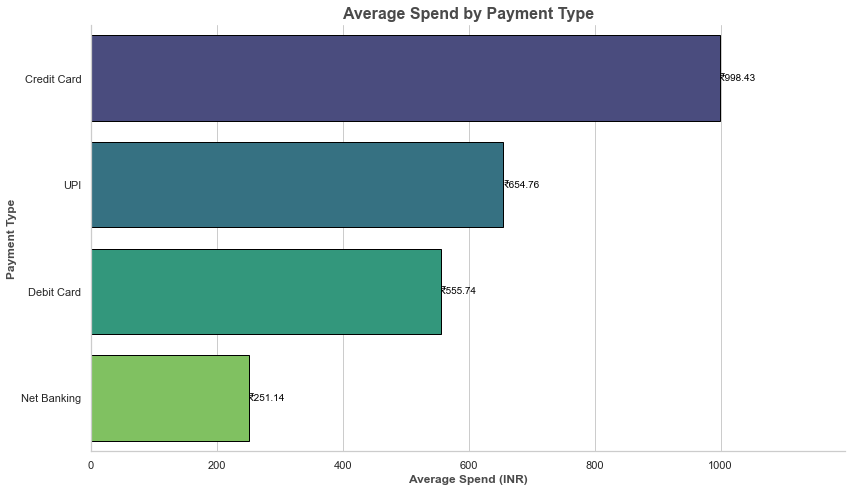

In [14]:
# Calculate Average Spend by Payment Type
avg_spend_payment = merged_data.groupby('payment_type')['spend'].mean().reset_index()

# Sort values for better visualization
avg_spend_payment = avg_spend_payment.sort_values(by='spend', ascending=False)

# Visualization: Modernized Average Spend by Payment Type
sns.set(style="whitegrid")  # Modern grid style
plt.figure(figsize=(12, 7))

# Color Palette for a modern look
colors = sns.color_palette("viridis", len(avg_spend_payment))

# Create the Barplot
barplot = sns.barplot(
    x='spend', 
    y='payment_type', 
    data=avg_spend_payment, 
    hue='payment_type',  # Assigning hue to avoid warning
    palette=colors, 
    edgecolor='black', 
    legend=False  # Disable legend
)

# Add annotations for each bar
for i, value in enumerate(avg_spend_payment['spend']):
    plt.text(value, i, f'₹{value:.2f}', ha='left', va='center', fontsize=10, color='black')

# Adding titles and labels
plt.title('Average Spend by Payment Type', fontsize=16, fontweight='bold', color='#4a4a4a')
plt.xlabel('Average Spend (INR)', fontsize=12, fontweight='bold', color='#4a4a4a')
plt.ylabel('Payment Type', fontsize=12, fontweight='bold', color='#4a4a4a')

# Modern aesthetic tweaks
plt.xlim(0, avg_spend_payment['spend'].max() * 1.2)  # Add extra space on x-axis
plt.tight_layout()  # Adjust layout for better spacing
sns.despine()  # Remove top and right borders for a cleaner look

# Show the plot
plt.show()
